In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.tree import plot_tree



In [ ]:
file_path = 'AfSmote_Data.csv'
data = pd.read_csv(file_path)

data.head()


,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,3,2,39,5,1,3,12691.0,777,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,2,4,44,6,1,2,8256.0,864,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,51,3,2,3,36,4,1,0,3418.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,40,3,5,2,21,5,1,0,4716.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


Feature: Customer_Age, Score: 0.02075
Feature: Dependent_count, Score: 0.00770
Feature: Education_Level, Score: 0.00735
Feature: Income_Category, Score: 0.00751
Feature: Months_on_book, Score: 0.01390
Feature: Total_Relationship_Count, Score: 0.05310
Feature: Months_Inactive_12_mon, Score: 0.01500
Feature: Contacts_Count_12_mon, Score: 0.01079
Feature: Credit_Limit, Score: 0.02295
Feature: Total_Revolving_Bal, Score: 0.09550
Feature: Avg_Open_To_Buy, Score: 0.02227
Feature: Total_Amt_Chng_Q4_Q1, Score: 0.04488
Feature: Total_Trans_Amt, Score: 0.19137
Feature: Total_Trans_Ct, Score: 0.21228
Feature: Total_Ct_Chng_Q4_Q1, Score: 0.08330
Feature: Avg_Utilization_Ratio, Score: 0.05516
Feature: Gender_F, Score: 0.03131
Feature: Gender_M, Score: 0.02753
Feature: Marital_Status_Divorced, Score: 0.00479
Feature: Marital_Status_Married, Score: 0.03431
Feature: Marital_Status_Single, Score: 0.03163
Feature: Card_Category_Blue, Score: 0.00320
Feature: Card_Category_Gold, Score: 0.00120
Feature: Ca

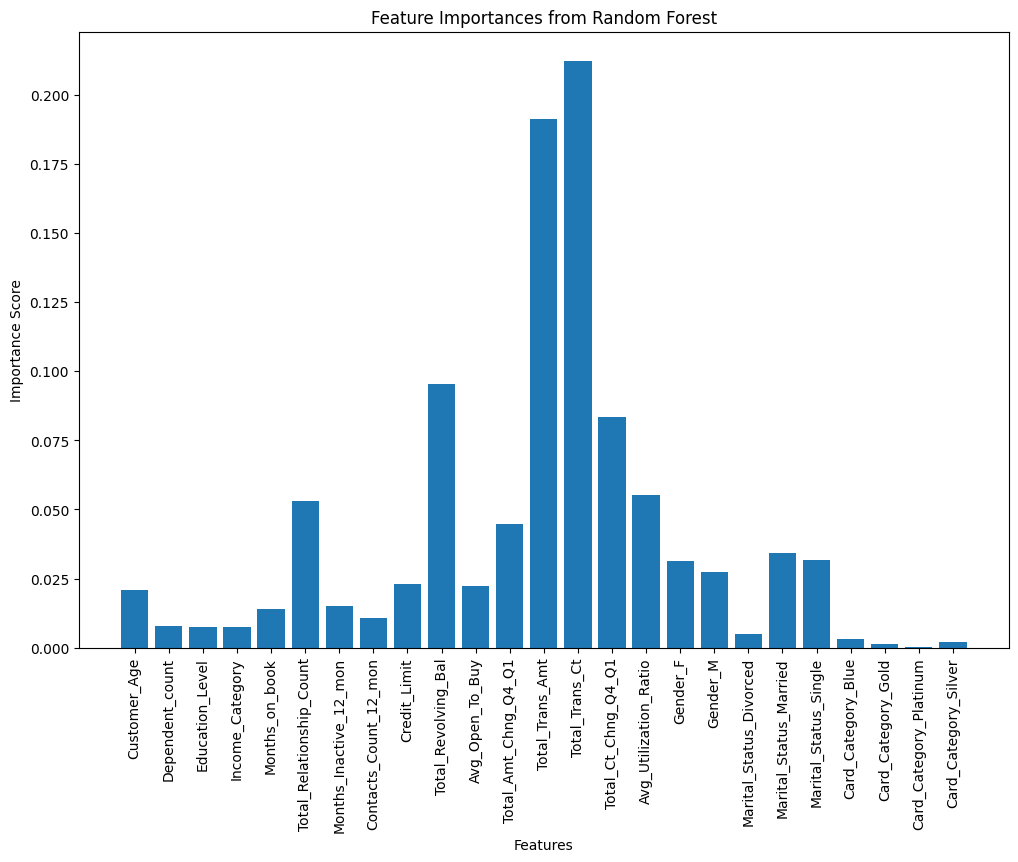

In [ ]:
# Separating the features and the target variable
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Initialize and fit the Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Getting feature importances and feature names
importances = model.feature_importances_
feature_names = X.columns  # Getting the feature names

# Print feature importance
for i in range(len(importances)):
    print(f'Feature: {feature_names[i]}, Score: {importances[i]:.5f}')

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:

feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Sorted Feature Importances:")
feature_importances


Sorted Feature Importances:


Total_Trans_Ct              0.212283
Total_Trans_Amt             0.191374
Total_Revolving_Bal         0.095499
Total_Ct_Chng_Q4_Q1         0.083295
Avg_Utilization_Ratio       0.055164
Total_Relationship_Count    0.053101
Total_Amt_Chng_Q4_Q1        0.044878
Marital_Status_Married      0.034308
Marital_Status_Single       0.031629
Gender_F                    0.031307
Gender_M                    0.027532
Credit_Limit                0.022947
Avg_Open_To_Buy             0.022267
Customer_Age                0.020754
Months_Inactive_12_mon      0.014998
Months_on_book              0.013900
Contacts_Count_12_mon       0.010789
Dependent_count             0.007704
Income_Category             0.007511
Education_Level             0.007353
Marital_Status_Divorced     0.004786
Card_Category_Blue          0.003202
Card_Category_Silver        0.001990
Card_Category_Gold          0.001195
Card_Category_Platinum      0.000234
dtype: float64

In [ ]:

model_lr = LogisticRegression(max_iter=100)

# Initialize RFE with the Logistic Regression model
rfe = RFE(estimator=model_lr, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X, y)  # Using the full dataset for RFE
feature_names_rfe = X.columns  # Getting the feature names

# Print the results of RFE feature selection
rfe_results = [(feature_names_rfe[i], rfe.support_[i], rfe.ranking_[i]) for i in range(len(rfe.support_))]
rfe_results_df = pd.DataFrame(rfe_results, columns=['Feature', 'Selected', 'Rank'])

rfe_results_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Feature,Selected,Rank
0,Customer_Age,False,5
1,Dependent_count,False,2
2,Education_Level,False,7
3,Income_Category,False,4
4,Months_on_book,False,9
5,Total_Relationship_Count,True,1
6,Months_Inactive_12_mon,True,1
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
9,Total_Revolving_Bal,True,1


In [ ]:
rfe_results_sorted_df = rfe_results_df.sort_values(by='Rank')
rfe_results_sorted_df


,Feature,Selected,Rank
9,Total_Revolving_Bal,True,1
16,Gender_F,True,1
20,Marital_Status_Single,True,1
5,Total_Relationship_Count,True,1
6,Months_Inactive_12_mon,True,1
7,Contacts_Count_12_mon,True,1
8,Credit_Limit,True,1
14,Total_Ct_Chng_Q4_Q1,True,1
10,Avg_Open_To_Buy,True,1
21,Card_Category_Blue,True,1


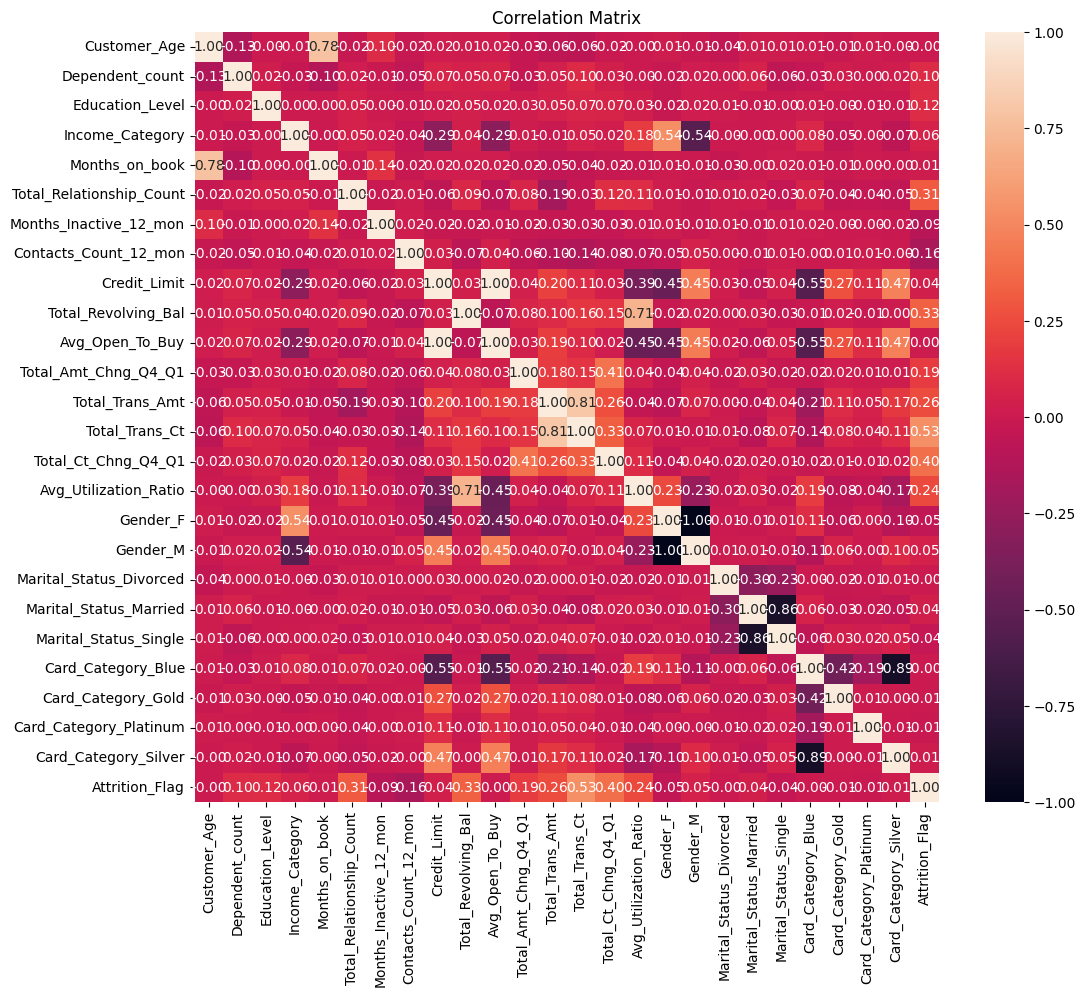

Attrition_Flag              1.000000
Total_Trans_Ct              0.534760
Total_Ct_Chng_Q4_Q1         0.398297
Total_Revolving_Bal         0.334176
Total_Relationship_Count    0.308418
Total_Trans_Amt             0.255231
Avg_Utilization_Ratio       0.240270
Total_Amt_Chng_Q4_Q1        0.185172
Education_Level             0.115485
Dependent_count             0.104803
Income_Category             0.057281
Gender_M                    0.054468
Marital_Status_Married      0.036806
Credit_Limit                0.035888
Card_Category_Silver        0.011182
Months_on_book              0.008830
Avg_Open_To_Buy             0.003008
Marital_Status_Divorced    -0.000196
Customer_Age               -0.002969
Card_Category_Blue         -0.004824
Card_Category_Gold         -0.005416
Card_Category_Platinum     -0.014942
Marital_Status_Single      -0.037388
Gender_F                   -0.054468
Months_Inactive_12_mon     -0.088356
Contacts_Count_12_mon      -0.156190
Name: Attrition_Flag, dtype: float64

In [ ]:
# calculating the correlation matrix
corr_matrix = data.corr()

# visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# printing the sorted correlation values for 'Attrition Flag'
sorted_corr_attrition_flag = corr_matrix['Attrition_Flag'].sort_values(ascending=False)
sorted_corr_attrition_flag


In [ ]:
# Creating the specified feature sets and including the target variable
set1_features = ['Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count']
set2_features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
                 'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
                 'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue',
                 'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt']
target = 'Attrition_Flag'

set1_data = data[set1_features + [target]]
set2_data = data[set2_features + [target]]

# Displaying the first few rows of each set
set1_data_head = set1_data.head()
set2_data_head = set2_data.head()

set1_data_head


,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Attrition_Flag
0,777,1.625,5,1
1,864,3.714,6,1
2,0,2.333,4,1
3,2517,2.333,3,1
4,0,2.500,5,1


In [ ]:
set2_data_head

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Attrition_Flag
0,42,777,1.625,5,0.061,1.335,12691.0,0.0,2,1.0,11914.0,1,3,1144,1
1,33,864,3.714,6,0.105,1.541,8256.0,1.0,4,1.0,7392.0,1,2,1291,1
2,20,0,2.333,4,0.000,2.594,3418.0,0.0,3,1.0,3418.0,1,0,1887,1
3,20,2517,2.333,3,0.760,1.405,3313.0,1.0,4,1.0,796.0,4,1,1171,1
4,28,0,2.500,5,0.000,2.175,4716.0,0.0,2,1.0,4716.0,1,0,816,1


In [ ]:
# Splitting the datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    set1_data.drop(target, axis=1), set1_data[target], test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    set2_data.drop(target, axis=1), set2_data[target], test_size=0.2, random_state=42)

# Initializing Decision Tree classifiers
model1 = DecisionTreeClassifier(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)

# Fitting the models
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

# Making predictions
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

# Calculating performance metrics for both models
metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_pred),
    'Precision': precision_score(y1_test, y1_pred),
    'Recall': recall_score(y1_test, y1_pred),
    'F1 Score': f1_score(y1_test, y1_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_pred)
}

metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_pred),
    'Precision': precision_score(y2_test, y2_pred),
    'Recall': recall_score(y2_test, y2_pred),
    'F1 Score': f1_score(y2_test, y2_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_pred)
}

metrics1, metrics2


({'Accuracy': 0.758235294117647,
  'Precision': 0.7505868544600939,
  'Recall': 0.763126491646778,
  'F1 Score': 0.7568047337278105,
  'ROC AUC Score': 0.758303385034526},
 {'Accuracy': 0.945,
  'Precision': 0.9387153800824986,
  'Recall': 0.9504773269689738,
  'F1 Score': 0.9445597391046545,
  'ROC AUC Score': 0.9450762504914474})

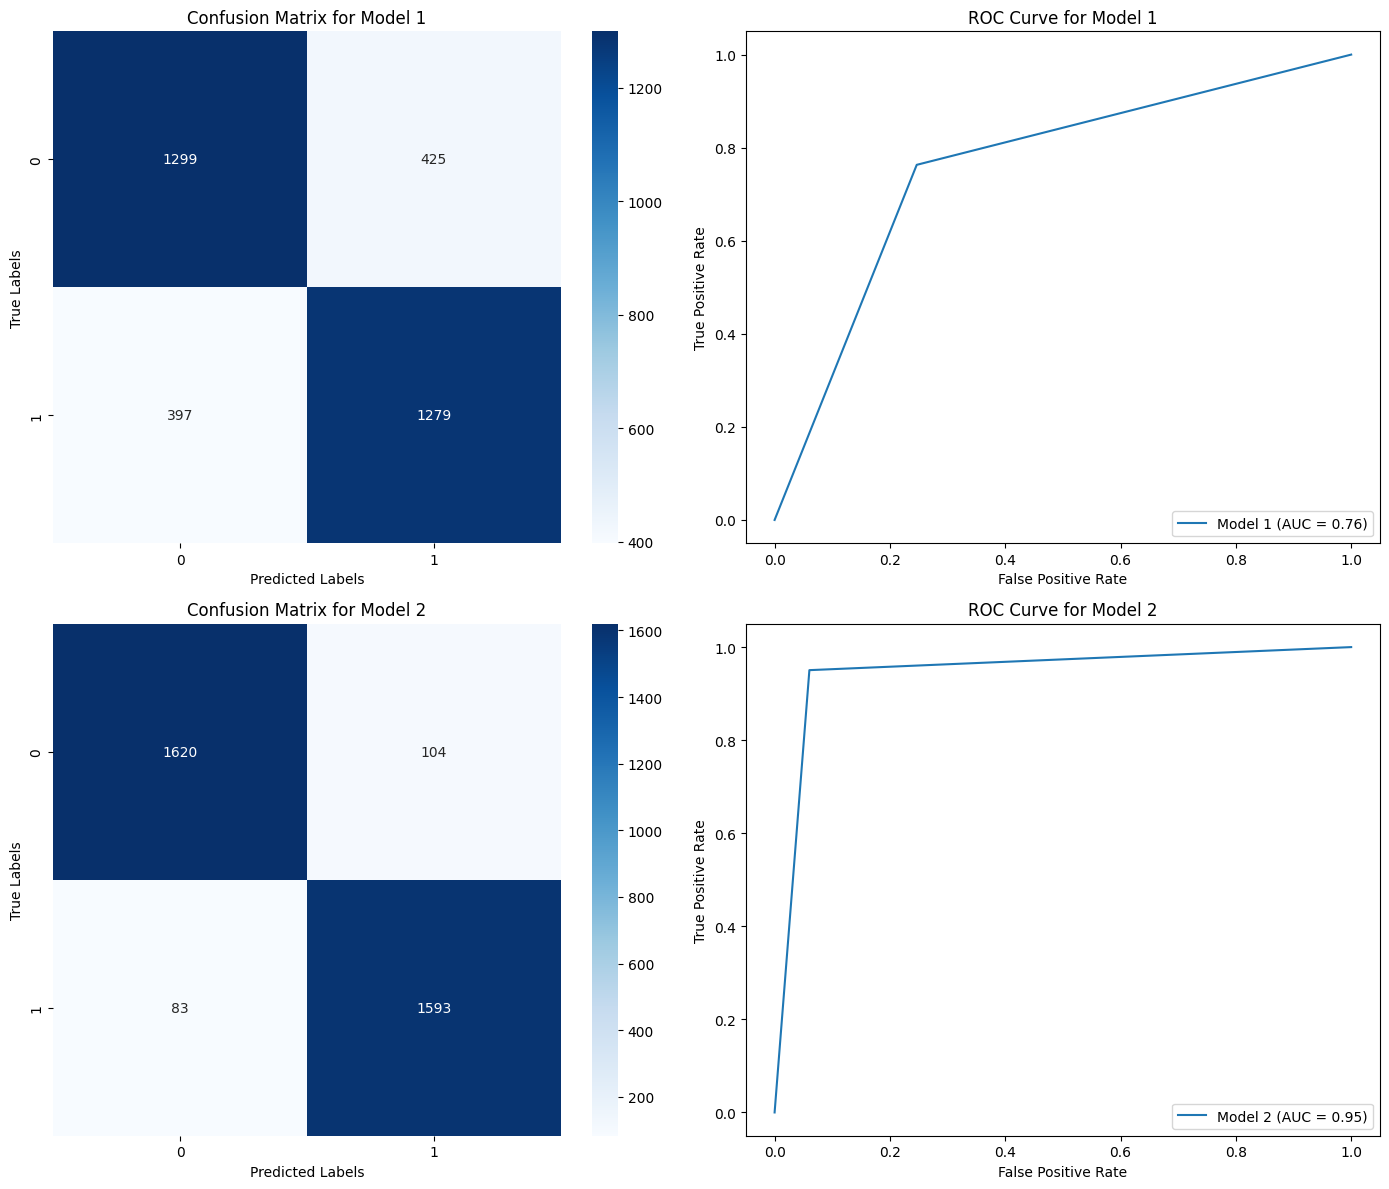

In [ ]:
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred)
roc_auc1 = auc(fpr1, tpr1)

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)
roc_auc2 = auc(fpr2, tpr2)

# Plotting the confusion matrices and ROC curves
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# Model 1 Confusion Matrix
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

# Model 1 ROC Curve
RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Model 1').plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Model 1')

# Model 2 Confusion Matrix
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

# Model 2 ROC Curve
RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2, estimator_name='Model 2').plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Model 2')

plt.tight_layout()
plt.show()


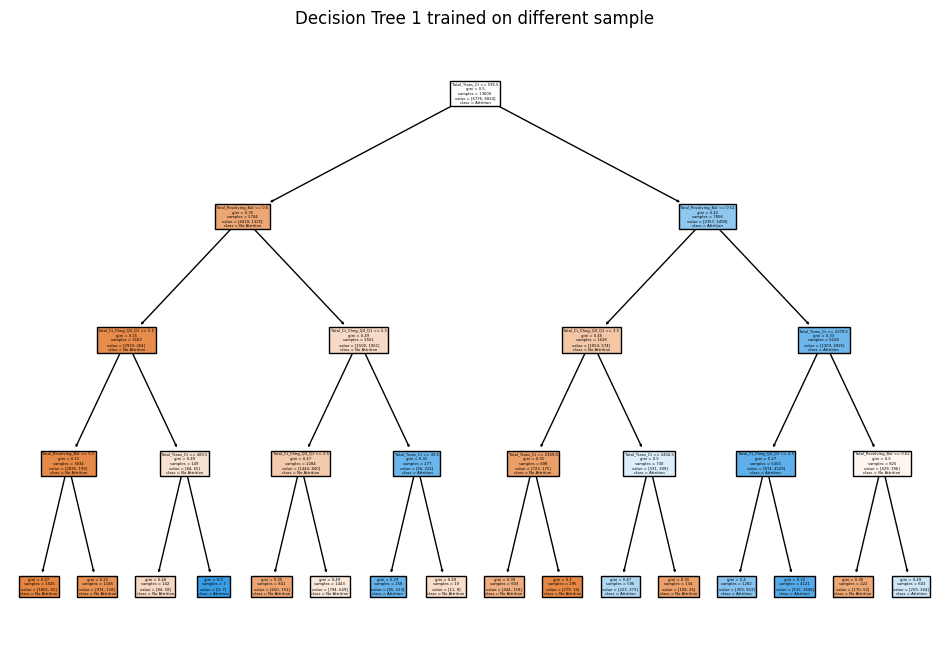

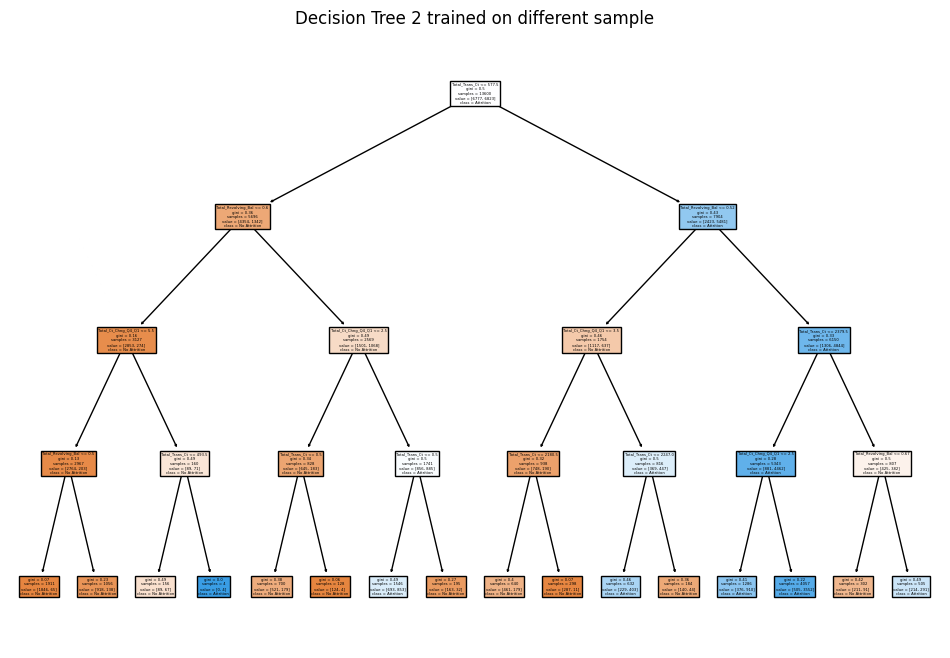

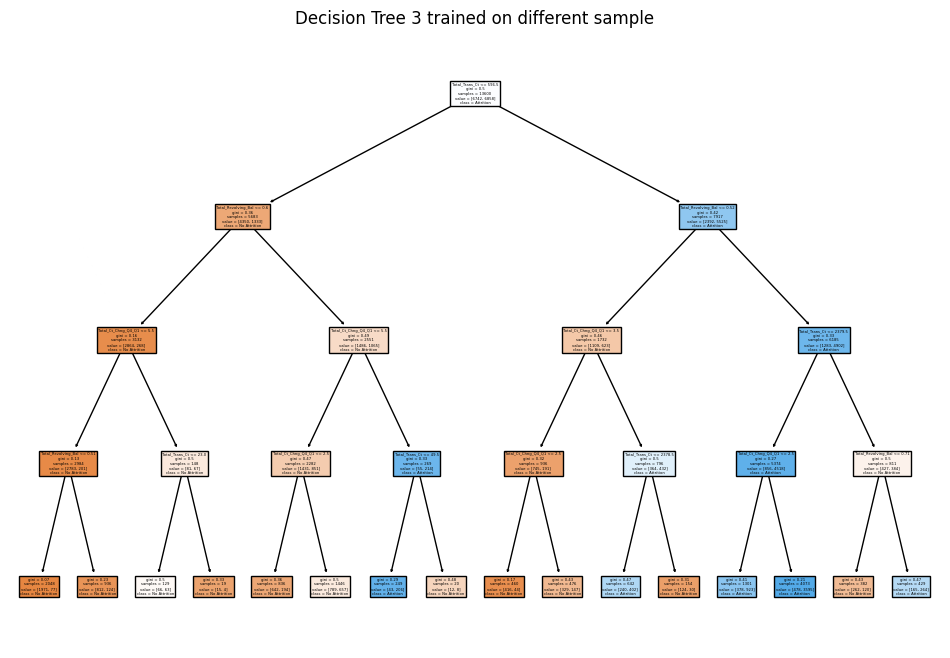

In [ ]:
#SET-1
# Placeholder for trained trees and their subsets
class_trees = []
X_train_samples = []
y_train_samples = []

# Create and train three small decision trees on different random samples
for i in range(3):
    # Sample 70% of the data randomly without replacement for training
    X_sample, _, y_sample, _ = train_test_split(
        set1_data.drop(target, axis=1), set1_data[target], train_size=0.8, random_state=42+i)

    # Store samples for possible future reference
    X_train_samples.append(X_sample)
    y_train_samples.append(y_sample)

    # Initialize and train a small Decision Tree Classifier with max_depth set
    dtree = DecisionTreeClassifier(random_state=42, max_depth=4)
    dtree.fit(X_sample, y_sample)
    class_trees.append(dtree)

# Plot and save each small tree
image_paths = []
for i, model in enumerate(class_trees):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, feature_names=set2_features, class_names=['No Attrition', 'Attrition'],
                   filled=True, proportion=False, precision=2)
    plt.title(f'Decision Tree {i+1} trained on different sample')
    plt.show()

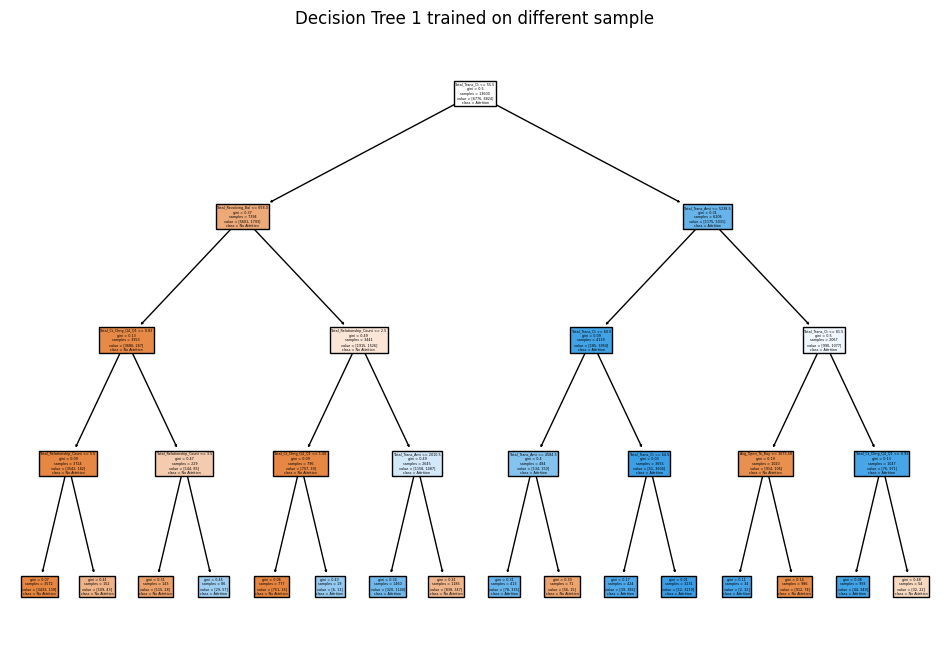

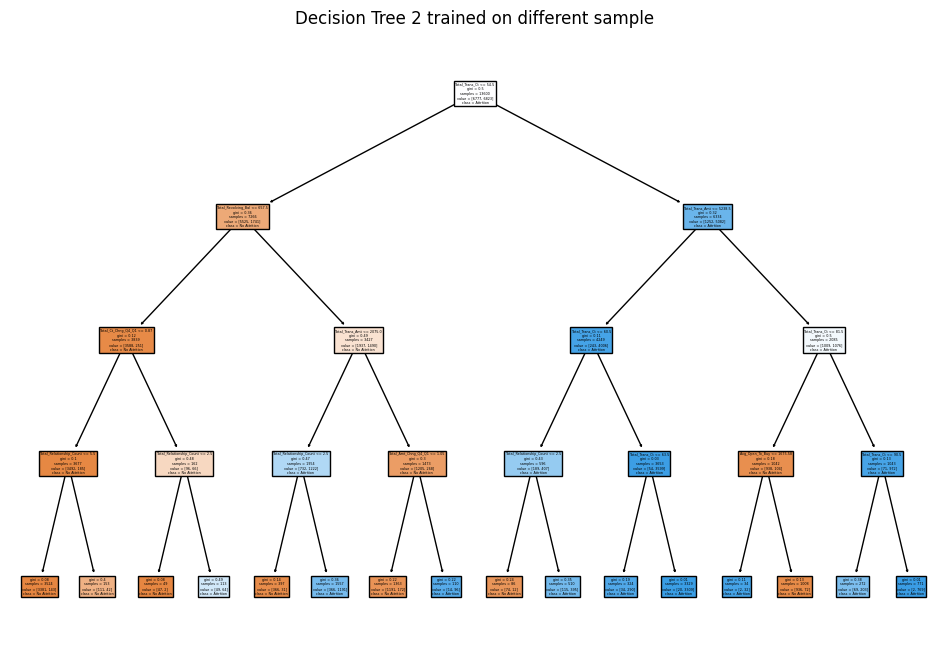

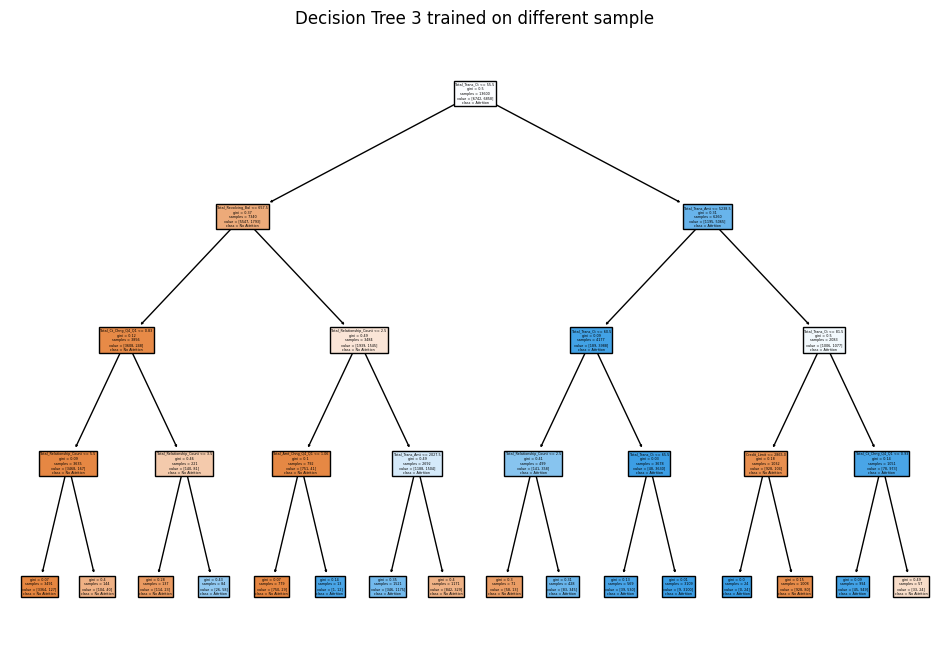

In [ ]:

#SET-2
# Placeholder for trained trees and their subsets
class_trees = []
X_train_samples = []
y_train_samples = []

# Create and train three small decision trees on different random samples
for i in range(3):
    # Sample 70% of the data randomly without replacement for training
    X_sample, _, y_sample, _ = train_test_split(
        set2_data.drop(target, axis=1), set2_data[target], train_size=0.8, random_state=42+i)

    # Store samples for possible future reference
    X_train_samples.append(X_sample)
    y_train_samples.append(y_sample)

    # Initialize and train a small Decision Tree Classifier with max_depth set
    dtree = DecisionTreeClassifier(random_state=42, max_depth=4)
    dtree.fit(X_sample, y_sample)
    class_trees.append(dtree)

# Plot and save each small tree
image_paths = []
for i, model in enumerate(class_trees):
    plt.figure(figsize=(12, 8))  # Adjust the size as needed
    tree.plot_tree(model, feature_names=set2_features, class_names=['No Attrition', 'Attrition'],
                   filled=True, proportion=False, precision=2)
    plt.title(f'Decision Tree {i+1} trained on different sample')
    plt.show()